In [127]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [128]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
#descarga las tablas y las almacena en la variable cat
def dow(url,cat):
    
    for i in range(len(url)):
        html = requests.get(url[i]).content
        x_list = pd.read_html(html,header=-1)
        x = x_list[0]
        cat.append(x[4:])

In [130]:
#hace una grafica de barras comparandolas por años
#what son los datos, name es el nombre de cada dato
def barritas(what,name):
    
    width=0.8/len(what)
    fig, ax = plt.subplots()
    
    for i in range(len(what)):
        ax.bar(cat[0]['year'] - width/2 + width*i, 100*what[i], width ,label=name[i])

#    plt.title(title)
    plt.grid()
    plt.legend()
    plt.xlabel('Año')
    plt.ylabel('% de la población')
    plt.show()

In [131]:
#Calcula la mediana
def median(data):
    n = len(data)
    index = n // 2
    
    if n % 2:
        return sorted(data)[index]
    
    return sum(sorted(data)[index - 1:index + 1]) / 2

# Readme

In [132]:
html = requests.get('https://github.com/resbaz/data/blob/master/marriage/README.md').content
x_list = pd.read_html(html,header=-1)
x = x_list[0]
x

,Header,Description
0,all,Total (or all men/women in sex-specific files)
1,HS,High school graduate or less (EDUCD < 65)
2,SC,Some college (EDUCD >= 65 & <= 100)
3,BAp,Bachelor's degree or more (EDUCD > 100)
4,BAo,"Bachelor's degree, no graduate degre (EDUCD > ..."
5,GD,Graduate degree (EDUCD > 113)
6,White,Non-Hispanic white
7,Black,Black or African-American
8,Hisp,Hispanic of any race
9,NE,New England (REGION == 11)


In [133]:
#tablas de datos que se van a analizar
#both sexes, divorces,men, women
url = ['https://github.com/resbaz/data/blob/master/marriage/both_sexes.csv',
      'https://github.com/resbaz/data/blob/master/marriage/divorce.csv',
      'https://github.com/resbaz/data/blob/master/marriage/men.csv',
      'https://github.com/resbaz/data/blob/master/marriage/women.csv'
      ]

cat = []
t=[]
#file='BvD.csv'

In [134]:
dow(url,cat)

# Plots

In [135]:
#De las tablas precargadas utilizaré los datos de 35 a 44 años 
# excepto para comparar la situación laboral que utilizare de 25 a 34 años.

#Los datos representan el índice con respecto a la población total de esa edad.

1- ¿Cómo es el índice de divorcios contra el de matrimonios?

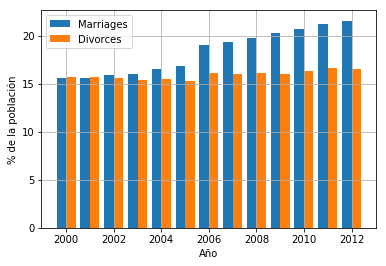

4     0.995013
5     0.994399
6     1.020242
7     1.045863
8     1.066639
9     1.102508
10    1.175078
11    1.205842
12    1.231200
13    1.265086
14    1.265965
15    1.276170
16    1.305348
Name: all_3544, dtype: float64

In [136]:
what = [cat[0]['all_3544'],cat[1]['all_3544']]
name = ['Marriages','Divorces']

barritas(what,name)

ratio = cat[0]['all_3544']/cat[1]['all_3544']
# ratio = pd.DataFrame(ratio, index=cat[0]['year'])
ratio

2- Comparar matrimonios por clase social

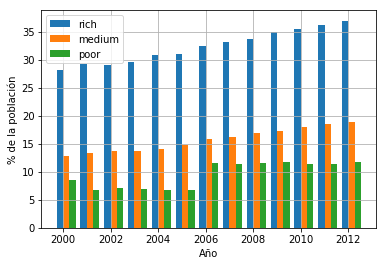

In [137]:
what = [cat[0]['poor_3544'],cat[0]['mid_3544'],cat[0]['rich_3544']]
name = ['rich','medium','poor']

barritas(what,name)

3- Comparar número de matrimonios divorcios con el nivel escolar

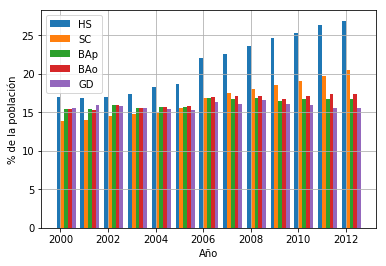

In [138]:
what = [cat[0]['HS_3544'],cat[0]['SC_3544'], cat[0]['BAp_3544'], cat[0]['BAo_3544'], cat[0]['GD_3544']]
name = ['HS', 'SC', 'BAp', 'BAo', 'GD']

barritas(what,name)

4- Comparar hombres contra mujeres

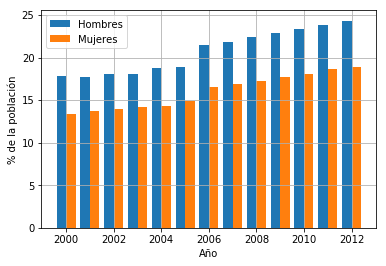

In [139]:
what = [cat[2]['all_3544'],cat[3]['all_3544']]
name = ['Hombres','Mujeres']

barritas(what,name)

5- Comparar por raza

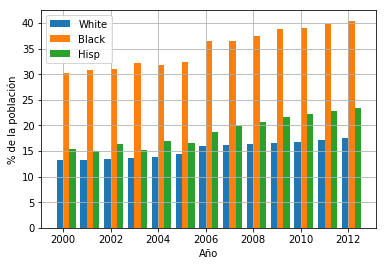

In [140]:
what = [cat[0]['White_3544'], cat[0]['Black_3544'], cat[0]['Hisp_3544']]
name = ['White', 'Black', 'Hisp']

barritas(what,name)

8- Comparar matrimonios por situación laboral

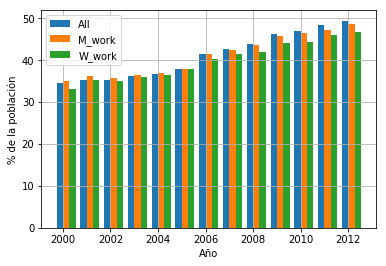

In [141]:
what = [cat[0]['all_2534'], cat[2]['work_2534'], cat[3]['work_2534']]
name = ['All', 'M_work','W_work']

barritas(what,name)

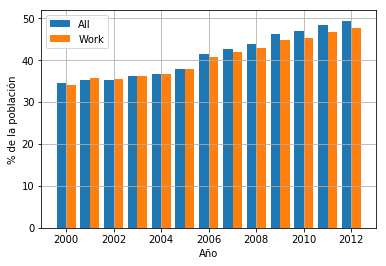

In [142]:
what = [cat[0]['all_2534'], (cat[2]['work_2534']+ cat[3]['work_2534'])/2]
name = ['All', 'Work']

barritas(what,name)

6- Identificar el año con más bodas, menos bodas, más divorcios, menos divorcios.

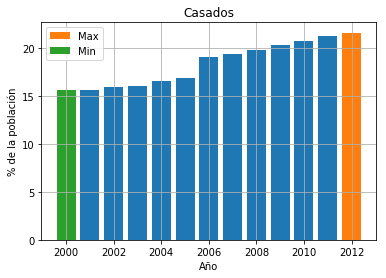

In [143]:
x=cat[0]['all_3544'][cat[0]['all_3544']==max(cat[0]['all_3544'])]
ma=x.keys()
x=cat[0]['all_3544'][cat[0]['all_3544']==min(cat[0]['all_3544'])]
mi=x.keys()

plt.bar(cat[0]['year'],100*cat[0]['all_3544'])
plt.bar(cat[0]['year'][ma],100*max(cat[0]['all_3544']), label='Max')
plt.bar(cat[0]['year'][mi],100*min(cat[0]['all_3544']), label='Min')
plt.title('Casados')
plt.grid()
plt.legend()
plt.xlabel('Año')
plt.ylabel('% de la población')
plt.show()

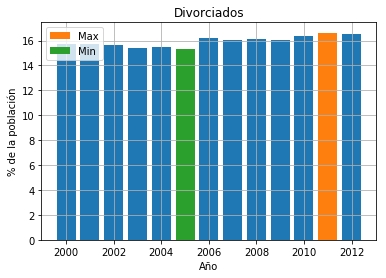

In [144]:
x=cat[1]['all_3544'][cat[1]['all_3544']==max(cat[1]['all_3544'])]
ma=x.keys()
x=cat[1]['all_3544'][cat[1]['all_3544']==min(cat[1]['all_3544'])]
mi=x.keys()

plt.bar(cat[1]['year'],100*cat[1]['all_3544'])
plt.bar(cat[1]['year'][ma],100*max(cat[1]['all_3544']), label='Max')
plt.bar(cat[1]['year'][mi],100*min(cat[1]['all_3544']), label='Min')
plt.title('Divorciados')
plt.grid()
plt.legend()
plt.xlabel('Año')
plt.ylabel('% de la población')
plt.show()

7-media, mediana y moda de matrimonios/divorcios a lo largo de los años

In [145]:
print('Casados')
#Promedio
print('Promedio',100*sum(cat[0]['all_2534']) / len(cat[0]['all_2534']))
#Mediana
print('Mediana',100*median(cat[0]['all_2534']))

Casados
Promedio 41.16245928886375
Mediana 41.47655670764989


In [146]:
print('Divorciados')
#Promedio
print('Promedio',100*sum(cat[1]['all_3544']) / len(cat[1]['all_3544']))
#Mediana
print('Mediana',100*median(cat[1]['all_3544']))

Divorciados
Promedio 15.936238344434374
Mediana 16.0468871507897
